In [48]:
# standard first block for defining the token and makinhg it available as a system variable for the session
# token must be replaced with new one once it has expired
token="ab2467e8fccd49cf8a52651dfef7f5b8"
import sys
sys.argv.append("--ident="+token)

In [49]:
import numpy as np
import pandas

import matplotlib.pyplot as plt
import skimage.io
import SciServer.CasJobs as CasJobs


In [50]:
query="""
select top 16 objId ,ra,dec,petror90_r 
  from Galaxy
"""
# query CasJobs table. Using DR12 as context
queryResponse = CasJobs.executeQuery(query, "DR12")
# parse results into pandas.DataFrame for further in memory processing
gals = pandas.read_csv(queryResponse,index_col=None)
gals['objId']=gals['objId'].astype(np.int64)

executeQuery POST response:  200 OK


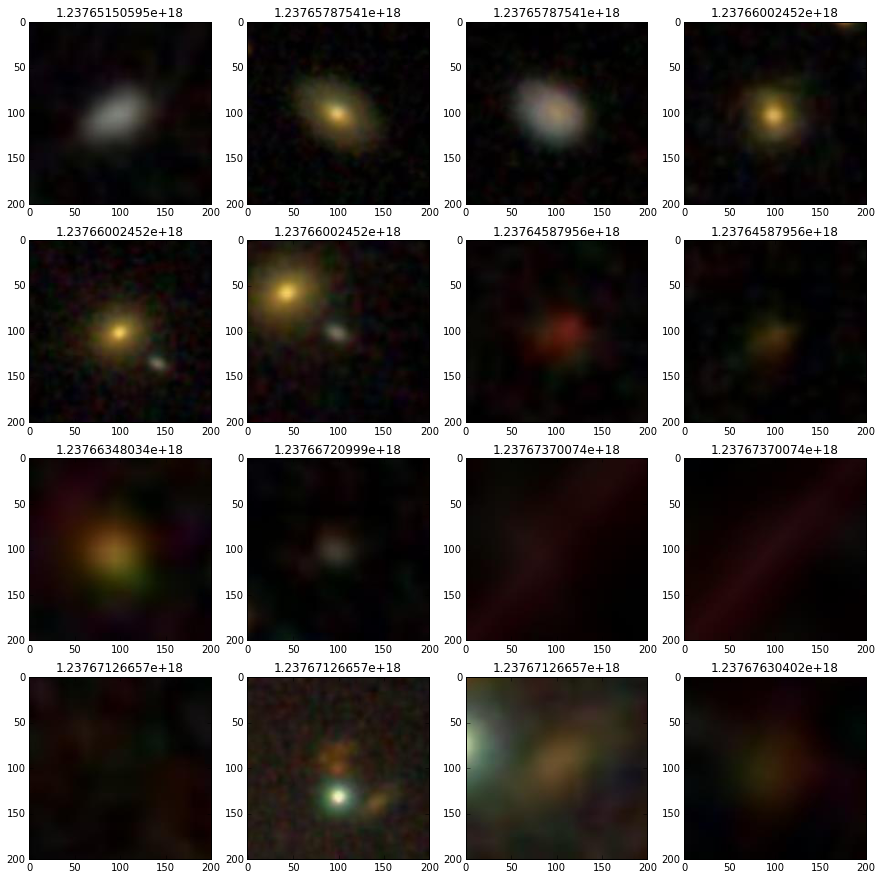

In [54]:
width=200
height=200
pixelsize=0.396
plt.figure(figsize=(15, 15))
subPlotNum = 1
for index,gal in gals.iterrows():
    scale=2*gal['petror90_r']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    plt.title(gal['objId'])

    